In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
inc=pd.read_csv('income.csv')
inc.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [3]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
np.unique(inc['age'])  # Divide the data into age groups in the interval of length 10

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

In [5]:
unique_values = {}
for column in inc.columns:
    unique_values[column] = ' '.join(map(str, inc[column].unique()))

# Print unique values for each column
for column, values in unique_values.items():
    print(f' $$ Unique values in {column}: {values}')

 $$ Unique values in age: 45 24 44 27 20 51 17 19 60 40 30 38 23 32 54 50 37 52 49 22 35 67 46 33 43 28 41 25 63 59 34 26 72 62 58 47 39 53 57 21 42 74 36 29 31 69 18 65 55 48 71 70 66 56 61 68 64 73 81 78 76 90 88 75 77 80 82 79 83 84 85 86 87
 $$ Unique values in JobType:  Private  Federal-gov  ?  Self-emp-inc  Self-emp-not-inc  Local-gov  State-gov  Without-pay  Never-worked
 $$ Unique values in EdType:  HS-grad  Some-college  9th  11th  Assoc-voc  Assoc-acdm  Bachelors  1st-4th  Masters  10th  12th  5th-6th  Prof-school  Doctorate  7th-8th  Preschool
 $$ Unique values in maritalstatus:  Divorced  Never-married  Married-civ-spouse  Widowed  Married-spouse-absent  Separated  Married-AF-spouse
 $$ Unique values in occupation:  Adm-clerical  Armed-Forces  Prof-specialty  Craft-repair  Sales  Exec-managerial  Machine-op-inspct  ?  Transport-moving  Farming-fishing  Tech-support  Other-service  Handlers-cleaners  Protective-serv  Priv-house-serv
 $$ Unique values in relationship:  Not-in

In [6]:
# Categorising age t0 different ranges 
# Define the bin edges and labels for age groups
bin_edges = [17, 30, 40, 50, 60, 90]  # Define your age group boundaries
bin_labels = ['17-29', '30-39', '40-49', '50-59', '60-90']  # Labels for the groups

# Create a new column 'age_group' with the age groups
inc['age_group'] = pd.cut(inc['age'], bins=bin_edges, labels=bin_labels, right=False)

# Now, 'age_group' will contain the age group for each row in the DataFrame.

In [7]:
# Replace "?" with NaN in the 'JobType' column
inc['JobType'] = inc['JobType'].replace(" ?", np.nan)

In [8]:
# Replace "?" with NaN in the 'occupation' column
inc['occupation'] = inc['occupation'].replace(" ?", np.nan)

In [9]:
inc.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
age_group          42
dtype: int64

In [10]:
# There are 1809 rows which have JobType and occupation have null values 

filtered_rows = inc[(inc['occupation'].isnull()) & (~inc['JobType'].isnull())]
# Display the filtered rows
print(filtered_rows)

# so jobtype which has null values in occupation is Never-worked . So it should be imputed with some other category.

       age        JobType         EdType        maritalstatus occupation  \
4825    18   Never-worked           10th        Never-married        NaN   
10215   23   Never-worked        7th-8th             Divorced        NaN   
14073   17   Never-worked           10th        Never-married        NaN   
19542   18   Never-worked           11th        Never-married        NaN   
22385   20   Never-worked   Some-college        Never-married        NaN   
31296   30   Never-worked        HS-grad   Married-civ-spouse        NaN   
31305   18   Never-worked   Some-college        Never-married        NaN   

         relationship    race   gender  capitalgain  capitalloss  \
4825        Own-child   White     Male            0            0   
10215   Not-in-family   White     Male            0            0   
14073       Own-child   White     Male            0            0   
19542       Own-child   White   Female            0            0   
22385       Own-child   Black     Male            0

In [11]:
# Replace null values in 'occupation' with "Unemployed" when 'JobType' is "Never-worked"
inc['occupation'] = inc.apply(
    lambda row: " Unemployed" if row['JobType'] == " Never-worked" and pd.isna(row['occupation']) else row['occupation'],axis=1)

In [12]:
inc.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1809
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
age_group          42
dtype: int64

In [13]:
# The dataset is conatining a large number of rows so we can afforf to remove rows containing null values
inc=inc.dropna()

In [14]:
inc.shape

(30134, 14)

In [15]:
inc.drop_duplicates(keep='first',inplace=True)
inc.shape

(26878, 14)

In [16]:
inc=inc.drop(['capitalgain','capitalloss'],axis=1)

# EDA

<BarContainer object of 15 artists>

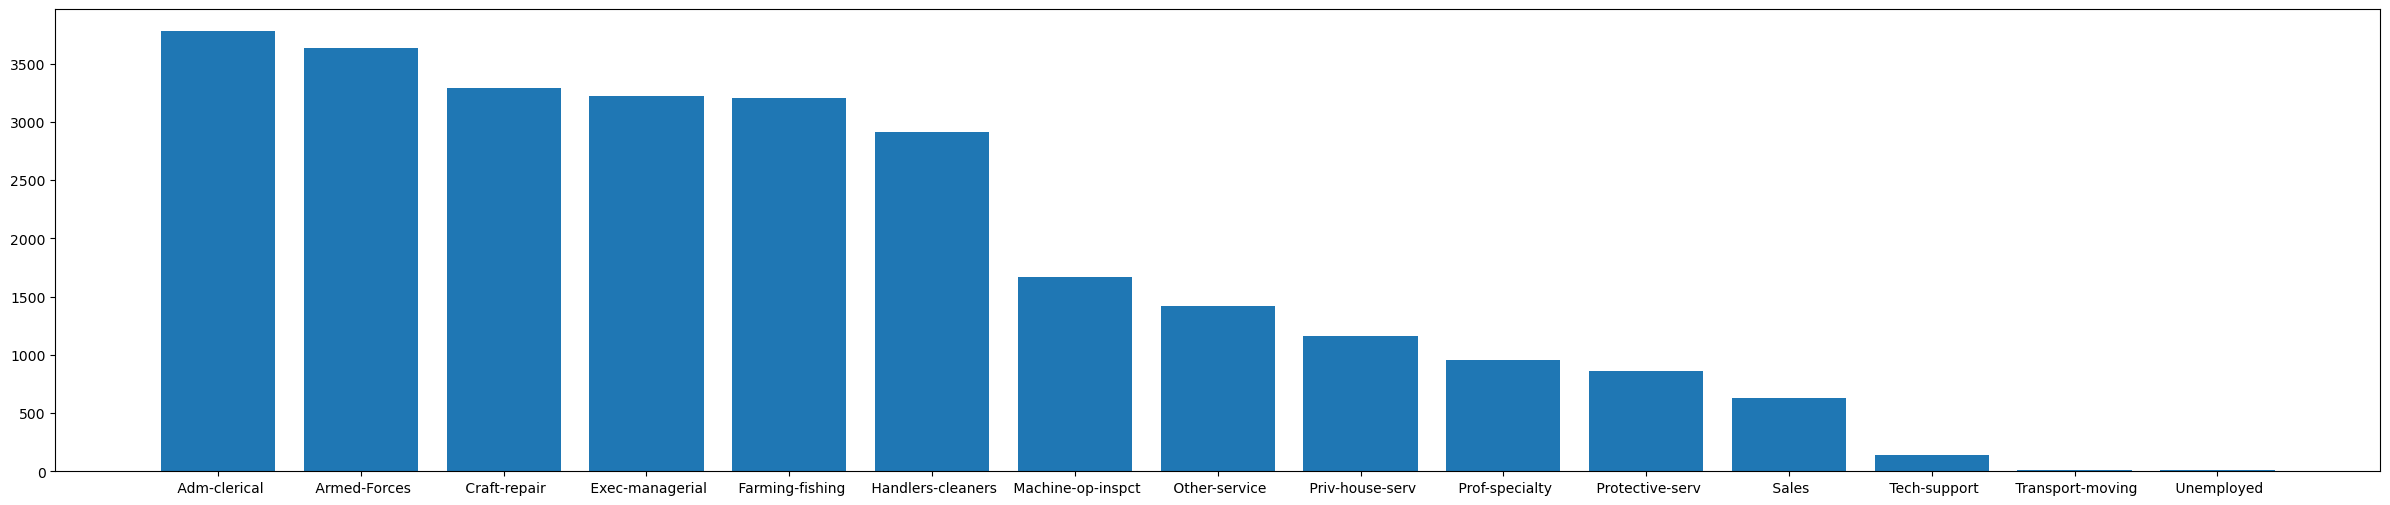

In [17]:
plt.figure(figsize=(30,6))
values=inc['occupation'].value_counts()
lst=list(np.unique(inc['occupation']))
plt.bar(lst,values)
#There are wide range of jobs being done by customers.

<BarContainer object of 6 artists>

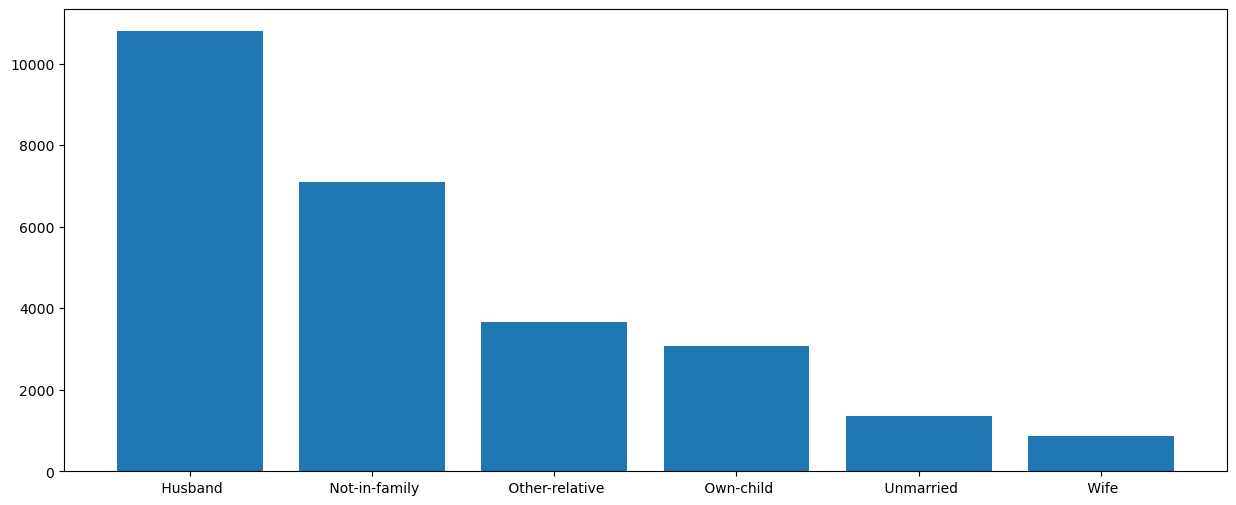

In [18]:
plt.figure(figsize=(15,6))
values=inc['relationship'].value_counts()
lst=list(np.unique(inc['relationship']))
plt.bar(lst,values)

<BarContainer object of 94 artists>

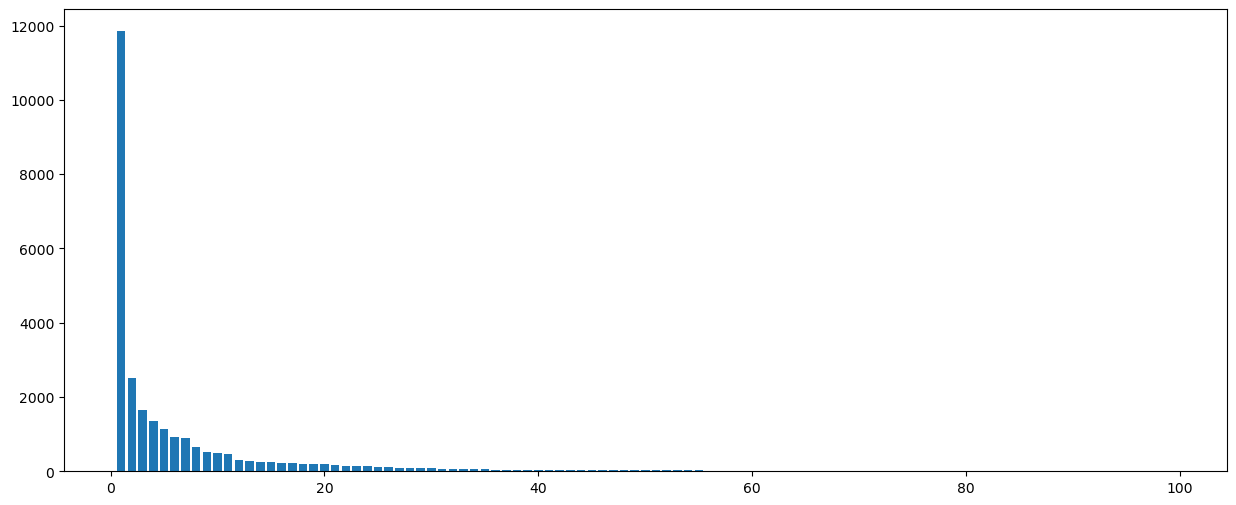

In [19]:
plt.figure(figsize=(15,6))
values=inc['hoursperweek'].value_counts()
lst=list(np.unique(inc['hoursperweek']))
plt.bar(lst,values)

In [20]:
cross_tab = pd.crosstab(inc['SalStat'], inc['hoursperweek'])
cross_tab

hoursperweek,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,94,95,96,97,98,99
SalStat,,,,,,,,,,,,,,,,,,,,,
"greater than 50,000",1,2,1,2,6,4,2,6,1,13,...,1,10,0,0,0,1,1,1,3,25
"less than or equal to 50,000",6,13,23,26,31,36,16,93,16,194,...,1,18,3,1,1,1,4,1,8,52


In [21]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


Chi-Square Statistic: 2079.3902282140043
P-value: 0.0
Degrees of Freedom: 93


In [22]:
cross_tab1 = pd.crosstab(inc['EdType'],inc['SalStat'])
print(cross_tab1)
chi2, p, dof, expected = chi2_contingency(cross_tab1)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                            56                            715
 11th                            59                            881
 12th                            29                            329
 1st-4th                          6                            143
 5th-6th                         12                            271
 7th-8th                         35                            505
 9th                             25                            423
 Assoc-acdm                     255                            738
 Assoc-voc                      333                            923
 Bachelors                     1886                           2610
 Doctorate                      269                             95
 HS-grad                       1426                           6833
 Masters                        862                           

In [23]:
cross_tab2 = pd.crosstab(inc['maritalstatus'],inc['SalStat'])
print(cross_tab2)
chi2, p, dof, expected = chi2_contingency(cross_tab2)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

SalStat                  greater than 50,000   less than or equal to 50,000
maritalstatus                                                              
 Divorced                                449                           3560
 Married-AF-spouse                        10                             11
 Married-civ-spouse                     5775                           6580
 Married-spouse-absent                    31                            339
 Never-married                           463                           7918
 Separated                                66                            861
 Widowed                                  79                            736
Chi-Square Statistic: 5450.957595097082
P-value: 0.0
Degrees of Freedom: 6


In [24]:
cross_tab3 = pd.crosstab(inc['relationship'],inc['SalStat'])
print(cross_tab3)
chi2, p, dof, expected = chi2_contingency(cross_tab3)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

SalStat           greater than 50,000   less than or equal to 50,000
relationship                                                        
 Husband                         5082                           5712
 Not-in-family                    812                           6296
 Other-relative                    35                            838
 Own-child                         64                           3591
 Unmarried                        213                           2870
 Wife                             667                            698
Chi-Square Statistic: 5627.8968482096625
P-value: 0.0
Degrees of Freedom: 5


In [25]:
#changing all other values which are not white as non-white in column 'race'
# Replace values other than " White" with " Non-White" in the 'race' column
inc['new_race_column'] = np.where(inc['race'] == ' White',' White',' Non-White')
inc=inc.drop(['race'], axis=1)
inc.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,gender,hoursperweek,nativecountry,SalStat,age_group,new_race_column
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,Female,28,United-States,"less than or equal to 50,000",40-49,White
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,Male,40,United-States,"less than or equal to 50,000",17-29,White
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,Male,40,United-States,"greater than 50,000",40-49,White
3,27,Private,9th,Never-married,Craft-repair,Other-relative,Male,40,Mexico,"less than or equal to 50,000",17-29,White
4,20,Private,Some-college,Never-married,Sales,Not-in-family,Male,35,United-States,"less than or equal to 50,000",17-29,White


In [26]:
cross_tab3 = pd.crosstab(inc['new_race_column'],inc['SalStat'])
print(cross_tab3)
chi2, p, dof, expected = chi2_contingency(cross_tab3)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

SalStat           greater than 50,000   less than or equal to 50,000
new_race_column                                                     
 Non-White                        665                           3476
 White                           6208                          16529
Chi-Square Statistic: 232.13173989506066
P-value: 2.043877108883042e-52
Degrees of Freedom: 1


In [27]:
inc=inc.drop(['gender'],axis=1)

In [28]:
# Define your custom bins/ranges
bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
# Define labels for the bins
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
inc['hoursperweek_range'] = pd.cut(inc['hoursperweek'], bins=bins, labels=labels, right=False)
inc=inc.drop(['hoursperweek'],axis=1)
inc.head()


,age,JobType,EdType,maritalstatus,occupation,relationship,nativecountry,SalStat,age_group,new_race_column,hoursperweek_range
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,United-States,"less than or equal to 50,000",40-49,White,21-30
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,United-States,"less than or equal to 50,000",17-29,White,31-40
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,United-States,"greater than 50,000",40-49,White,31-40
3,27,Private,9th,Never-married,Craft-repair,Other-relative,Mexico,"less than or equal to 50,000",17-29,White,31-40
4,20,Private,Some-college,Never-married,Sales,Not-in-family,United-States,"less than or equal to 50,000",17-29,White,31-40


In [29]:
inc.info()
inc.drop_duplicates(keep='first',inplace=True)
inc.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26878 entries, 0 to 31976
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 26878 non-null  int64   
 1   JobType             26878 non-null  object  
 2   EdType              26878 non-null  object  
 3   maritalstatus       26878 non-null  object  
 4   occupation          26878 non-null  object  
 5   relationship        26878 non-null  object  
 6   nativecountry       26878 non-null  object  
 7   SalStat             26878 non-null  object  
 8   age_group           26878 non-null  category
 9   new_race_column     26878 non-null  object  
 10  hoursperweek_range  26776 non-null  category
dtypes: category(2), int64(1), object(8)
memory usage: 2.1+ MB


(23823, 11)

# Model 1: Filtered columns and then fitted model

In [59]:
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Reindexing the salary status names to 0,1
inc['SalStat']=inc['SalStat'].replace({' less than or equal to 50,000':0,' greater than 50,000':1})
# print(inc['SalStat'])

new_data=pd.get_dummies(inc, drop_first=True)

# Storing the column names 
columns_list=list(new_data.columns)
# print(columns_list)

# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
# print(features)

# Storing the output values in y
y=new_data['SalStat'].values
#print(y)

# Storing the values from input features
x = new_data[features].values
#print(x)

# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

# Make an instance of the Model
logistic = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fitting the values for x and y
logistic.fit(train_x,train_y)
print(logistic.coef_)
print(logistic.intercept_)

# Prediction from test data
prediction = logistic.predict(test_x)
# print(prediction)

# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

# Calculating the accuracy
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)


[[ 7.73935436e-01  5.11998939e-01  2.58357622e+00  3.23105831e-02
  -5.97357381e-01 -3.82766428e-01 -2.95109979e-02 -2.17354982e-02
  -5.24514047e-01  7.70316594e-01 -1.57552540e-02  4.18156849e-01
   6.08349580e-01  1.01072980e-01  3.63773514e-01 -1.23614651e-01
  -3.74001794e-01  7.61333738e-02 -7.81873210e-02  8.69914376e-02
   4.37396603e-01  7.68450592e-01  2.96368312e-01 -2.41976932e-01
   3.10284882e-01 -8.58716254e-01 -5.42159328e-01  2.13523302e+00
   2.32475759e-02 -2.24206924e-01 -2.41976932e-01  2.02446740e-01
  -2.68375670e-01  1.48752556e+00  3.96405974e-01 -7.16131219e-01
  -7.19498734e-01  6.91855533e-02 -7.51308859e-01  1.30863261e+00
  -2.95054155e-02  5.31868794e-01  1.52692921e-01  5.01024227e-01
   3.48550246e-01  9.49348310e-01 -7.17051398e-01 -8.44473775e-01
   1.03555849e+00 -7.50524461e-01 -1.83508385e-01  1.96185668e+00
  -3.72478859e-01 -3.59170414e-01  1.89725860e+00 -2.63876414e-01
   9.94751052e-01 -1.69456321e-01  1.37677254e-01 -5.63807693e-01
   3.80870

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

roc_auc = roc_auc_score(test_y, logistic.predict_proba(test_x)[:,1])

print("roc_auc score : ", roc_auc)
print("Classification Report :\n ",classification_report(test_y,prediction))
print("confusion Matrix:\n", confusion_matrix(test_y,prediction))

roc_auc score :  0.867570011811804
Classification Report :
                precision    recall  f1-score   support

           0       0.85      0.92      0.88      5338
           1       0.68      0.53      0.59      1809

    accuracy                           0.82      7147
   macro avg       0.76      0.72      0.74      7147
weighted avg       0.81      0.82      0.81      7147

confusion Matrix:
 [[4887  451]
 [ 859  950]]


# Model 2: Fitting model on just cleaned data

In [38]:
inc2=pd.read_csv('income.csv')
inc2.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [39]:
bin_edges = [17, 30, 40, 50, 60, 90]  # Define your age group boundaries
bin_labels = ['17-29', '30-39', '40-49', '50-59', '60-90']  # Labels for the groups

# Create a new column 'age_group' with the age groups
inc2['age_group'] = pd.cut(inc2['age'], bins=bin_edges, labels=bin_labels, right=False)


In [40]:
# Replace "?" with NaN in the 'JobType' column
inc2['JobType'] = inc2['JobType'].replace(" ?", np.nan)
# Replace "?" with NaN in the 'occupation' column
inc2['occupation'] = inc2['occupation'].replace(" ?", np.nan)

In [41]:
# Replace null values in 'occupation' with "Unemployed" when 'JobType' is "Never-worked"
inc2['occupation'] = inc2.apply(
    lambda row: " Unemployed" if row['JobType'] == " Never-worked" and pd.isna(row['occupation']) else row['occupation'],axis=1)

In [42]:
# The dataset is conatining a large number of rows so we can afforf to remove rows containing null values
inc2=inc2.dropna()
inc2.drop_duplicates(keep='first',inplace=True)
inc2.shape

(26878, 14)

In [43]:
inc2['new_race_column'] = np.where(inc2['race'] == ' White',' White',' Non-White')
inc2=inc2.drop(['race','age'],axis=1)

In [44]:
inc2.head()

,JobType,EdType,maritalstatus,occupation,relationship,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,age_group,new_race_column
0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,Female,0,0,28,United-States,"less than or equal to 50,000",40-49,White
1,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,Male,0,0,40,United-States,"less than or equal to 50,000",17-29,White
2,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,United-States,"greater than 50,000",40-49,White
3,Private,9th,Never-married,Craft-repair,Other-relative,Male,0,0,40,Mexico,"less than or equal to 50,000",17-29,White
4,Private,Some-college,Never-married,Sales,Not-in-family,Male,0,0,35,United-States,"less than or equal to 50,000",17-29,White


In [45]:
# Define your custom bins/ranges
bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
# Define labels for the bins
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
inc2['hoursperweek_range'] = pd.cut(inc2['hoursperweek'], bins=bins, labels=labels, right=False)
inc2=inc2.drop(['hoursperweek'],axis=1)
inc2.head()

,JobType,EdType,maritalstatus,occupation,relationship,gender,capitalgain,capitalloss,nativecountry,SalStat,age_group,new_race_column,hoursperweek_range
0,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,Female,0,0,United-States,"less than or equal to 50,000",40-49,White,21-30
1,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,Male,0,0,United-States,"less than or equal to 50,000",17-29,White,31-40
2,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,United-States,"greater than 50,000",40-49,White,31-40
3,Private,9th,Never-married,Craft-repair,Other-relative,Male,0,0,Mexico,"less than or equal to 50,000",17-29,White,31-40
4,Private,Some-college,Never-married,Sales,Not-in-family,Male,0,0,United-States,"less than or equal to 50,000",17-29,White,31-40


In [56]:
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

# Reindexing the salary status names to 0,1
inc2['SalStat']=inc2['SalStat'].replace({' less than or equal to 50,000':0,' greater than 50,000':1})
print(inc2['SalStat'])

new_data=pd.get_dummies(inc2, drop_first=True)

# Storing the column names 
columns_list=list(new_data.columns)
# print(columns_list)

# Separating the input names from data
features=list(set(columns_list)-set(['SalStat']))
# print(features)

# Storing the output values in y
y1=new_data['SalStat'].values
#print(y)

# Storing the values from input features
x1 = new_data[features].values
#print(x)

# Splitting the data into train and test
train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1,test_size=0.3, random_state=0)

# Make an instance of the Model
logistic2 = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the values for x and y
logistic2.fit(train_x1,train_y1)
logistic2.coef_
logistic2.intercept_

# Prediction from test data
prediction2 = logistic2.predict(test_x1)
print(prediction2)

# Confusion matrix
confusion_matrix2 = confusion_matrix(test_y, prediction2)
print(confusion_matrix2)

# Calculating the accuracy
accuracy_score2=accuracy_score(test_y1, prediction)
print(accuracy_score2)


0        0
1        0
2        1
3        0
4        0
        ..
31972    1
31973    0
31974    0
31975    0
31976    0
Name: SalStat, Length: 26878, dtype: int64
[1 1 0 ... 0 0 1]
[[5570  459]
 [ 814 1221]]
0.8421378968253969


In [57]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y1 != prediction2).sum())


Misclassified samples: 1273


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

roc_auc = roc_auc_score(test_y1, logistic2.predict_proba(test_x1)[:,1])

print("roc_auc score : ", roc_auc)
print("Classification Report :\n ",classification_report(test_y1,prediction2))
print("confusion Matrix:\n", confusion_matrix(test_y1,prediction))

roc_auc score :  0.9024328766408714
Classification Report :
                precision    recall  f1-score   support

           0       0.87      0.92      0.90      6029
           1       0.73      0.60      0.66      2035

    accuracy                           0.84      8064
   macro avg       0.80      0.76      0.78      8064
weighted avg       0.84      0.84      0.84      8064

confusion Matrix:
 [[5570  459]
 [ 814 1221]]
